# Breadth First Search

We will be trying to find and visualize the path between Equestrian Statue of Edward VII and Bahen Center of Technology around Toronto University campus using breadth first search


__BREADTH-FIRST-SEARCH__(graph) __returns__ a route and cost, or failure  
&emsp;__if__ _graph_ first node is a goal __then return__ empty path to initial state  
&emsp;_frontier_ &larr; a **FIFO** queue initially containing one path, for the _graph_'s initial node  
&emsp;_reached_ &larr; a set of states; initially empty  
&emsp;_solution_ &larr; failure  
&emsp;__while__  _frontier_ is not empty __do__  
&emsp;&emsp;&emsp;_parent_ &larr; the first node in _frontier_  
&emsp;&emsp;&emsp;__for__ _child_ __in__ successors(_parent_) __do__   
&emsp;&emsp;&emsp;&emsp;&emsp;_s_ &larr; _child_.state  
&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _s_ is a goal  __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__return__  _child_  
&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _s_ is not in _reached_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;add _s_ to _reached_  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;add _child_ to the end of _frontier_  
&emsp;__return__  _solution_

In [ ]:
%%capture

##############################################################################
# IGNORE if you are running on a local machine and have all the dependencies #
##############################################################################

# installing dependencies --- to be able to run on google colab
# it would take 2-3 minutes
!apt-get install libspatialindex-c4v5;
!pip3 install Rtree;
!pip3 install osmnx;
!pip3 install tqdm;

# you HAVE to upload a number of files and folders used in the code
# problem.py - utils.py - data files inside directory named data
# upload them in the home directory --- don't go into any folder, just press upload button
# and choose these files and folders
# so tthe directory should be 
#|- data/       |- graph.html
#|              |- route.html 
#|- sample_data/ 
#|- problem.py
#|- utils.py

In [25]:
import osmnx as ox
import networkx as nx
from tqdm import tqdm
import time, random
from IPython.display import IFrame, HTML
from collections import deque
import matplotlib.pyplot as plt
from problem import *
from utils import *

Here OSMnx find the largest connected component centered around the ```location point``` with specified ```dist``` on each side (w/n/e/s).

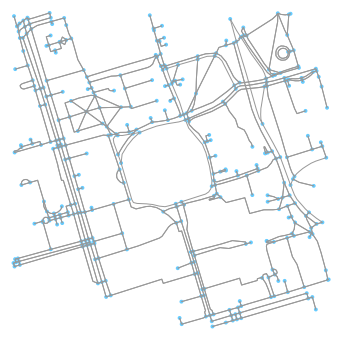

In [63]:
location_point = (43.661667, -79.395)
G = ox.graph_from_point(location_point, dist=300, clean_periphery=True, simplify=True)
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
fig, ax = ox.plot_graph(G)

In [ ]:
# we need to save the graph 
filepath = 'data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

Here you need to specify which node from our graph is the source (Equestrian Statue of Edward VII) and which is the destination node (Bahen Center of Technology). You can do so by acquiring the decimal coordinates of the desired node and use [```osmnx.distance.get_nearest_node```](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.get_nearest_node) method

I used the aforementioned method and found that the nodes for destination and source are 389677909, 55808290 respectively

In [ ]:
# marking both the source and destination node

nc = ['r' if node == 389677909 or node == 55808290 else '#336699' for node in G.nodes()]
ns = [50 if node == 389677909 or node == 55808290 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

Each node in our graph is represented as a dictionary so manipulating them would obfuscate the algorithm manipulating them and would be unnecessary expensive computationally <b>so</b> we define class ```Node``` only retains the data we need to be able to do searching and traversing.

Please check its source code in ```./problem.py``` to know how it capture the data from the graph

In [ ]:
%%capture
source(Node)

# The Algorithm

In [ ]:
# first define the origin/source nodes as Node
origin = Node(graph = G, node = G[55808290], osmid = 55808290, distance = 0, parent = None)
destination = Node(graph = G, node = G[389677909], osmid = 389677909)

In [ ]:
bar = tqdm(total=len(G))
route = []
frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    bar.update(1); time.sleep(0.1)
    node = frontier.popleft()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route, cost = child.path()
                print(route)
                found = True
            frontier.append(child)

bar.close()
print(route)

let's see the length of that route

In [ ]:
fig, ax = ox.plot_graph_route(G, route)

In [ ]:
route_map = ox.plot_route_folium(G, route)
filepath = 'data/route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [12]:
G1 = ox.graph_from_xml("./export.osm", simplify = False, retain_all = True)

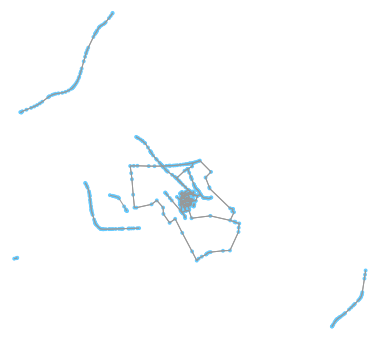

In [13]:
fig, ax = ox.plot_graph(G1)

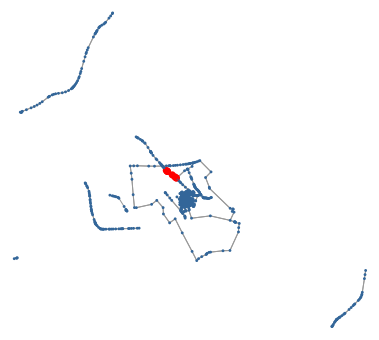

In [35]:
nc = ['r' if node in [*find_by_osmid(G1,   295165976)]  else '#336699' for node in G1.nodes()]
ns = [50 if node in [*find_by_osmid(G1,   295165976)] else 8 for node in G1.nodes()]
fig, ax = ox.plot_graph(G1, node_size=ns, node_color=nc, node_zorder=2)

In [10]:
def find_by_osmid(G, osmid):
    for node in G:
        for neighbour in G[node]:
            if G[node][neighbour][0]['osmid'] == osmid:
                yield neighbour

In [30]:
[*find_by_osmid(G1,  10520720)]

[1558192206,
 2252681723,
 90635844,
 791872701,
 650081636,
 90635840,
 90635845,
 2252681747,
 2252681762,
 248035610,
 1558192211,
 648620456]

In [4]:
from ipyleaflet import Map, Marker


In [21]:
center = ( 50.749388,7.130756 )

m = Map(center=center, zoom=15)

marker = Marker(location=(50.747603,7.136665), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.747535,7.136541), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.747111, 7.135578), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.747072,7.135416), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.746944,7.13461), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.746868,7.133971), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.74688,7.133253), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.746891,7.132963), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.746938,7.13185), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.748947, 7.131108), draggable=False)
m.add_layer(marker);
marker = Marker(location=(50.749388, 7.130756), draggable=False)
m.add_layer(marker);

m

Map(center=[50.749388, 7.130756], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [23]:
from ipyleaflet import Map, Polyline, AntPath


In [24]:
line = AntPath(
    locations=[
        [50.747603,7.136665],
        [50.747535,7.136541],
        [50.747111, 7.135578],
        [50.747072,7.135416],
        [50.746944,7.13461],
        [50.746868,7.133971],
        [50.74688,7.133253],
        [50.746891,7.132963],
        [50.746938,7.13185],
        [50.748947, 7.131108],
        [50.749388, 7.130756]
        
    ],
#     color="green" ,
#     fill=False
    dash_array=[1, 10],
    delay=1000,
    color='#7590ba',
    pulse_color='#3f6fba'
)
m = Map(center = ( 50.749388,7.130756 ), zoom =20)
m.add_layer(line)
m

Map(center=[50.749388, 7.130756], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [28]:
G.nodes()

NodeView((50897923, 703098888, 7311057930, 7311057931, 7311057936, 7311057937, 123347984, 1258707987, 1258707990, 389678107, 749952029, 389678111, 389678112, 389678113, 389678121, 389678122, 389678124, 856205360, 389678131, 389678133, 389678134, 389678136, 24960058, 389678138, 389678140, 2143494205, 389678139, 2143494207, 24960060, 130170945, 24960063, 389678142, 389678145, 389678146, 4295105603, 24960068, 24960070, 389678151, 389678150, 24960073, 24960076, 389678157, 779168848, 24960080, 779168853, 4923076695, 4638500954, 24960090, 3443966044, 779168865, 389678180, 389678181, 389678182, 389678183, 389678184, 779168874, 2143434860, 773005421, 2143434862, 2143434863, 779168879, 779168881, 304892018, 2557542523, 2144966781, 2557542526, 389678214, 389678215, 389678216, 389678220, 389678221, 389678222, 2480712846, 2480712845, 2143404199, 2143404200, 55808169, 389678250, 4380884142, 4380884143, 1252845744, 55808177, 749951161, 389678267, 389678268, 389678273, 389678274, 3311164627, 55808224

In [29]:
G[50897923]

AdjacencyView({50899731: {0: {'osmid': 229683187, 'oneway': True, 'lanes': '3', 'name': "Queen's Park Crescent West", 'highway': 'secondary', 'maxspeed': '50', 'length': 63.226, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fba7f7eafd0>}}})

In [67]:
G1 = ox.graph_to_gdfs(G)

In [87]:
for row in G1[0]:
    print(G1[0][row])

50897923      43.661393
703098888     43.660736
7311057930    43.660384
7311057931    43.660348
7311057936    43.660434
7311057937    43.660573
123347984     43.659492
1258707987    43.662295
1258707990    43.661657
389678107     43.663086
749952029     43.659766
389678111     43.662654
389678112     43.662613
389678113     43.662589
389678121     43.662259
389678122     43.662235
389678124     43.661147
856205360     43.662164
389678131     43.660751
389678133     43.659882
389678134     43.659160
389678136     43.659195
24960058      43.663620
389678138     43.661211
389678140     43.661393
2143494205    43.661393
389678139     43.661247
2143494207    43.661436
24960060      43.663371
130170945     43.662550
24960063      43.663584
389678142     43.662120
389678145     43.662520
389678146     43.662567
4295105603    43.664098
24960068      43.663027
24960070      43.662499
389678151     43.662474
389678150     43.663350
24960073      43.662285
24960076      43.661766
389678157     43

In [88]:
G1[0]

,y,x,osmid,highway,geometry
50897923,43.661393,-79.392206,50897923,NaN,POINT (-79.39221 43.66139)
703098888,43.660736,-79.398219,703098888,NaN,POINT (-79.39822 43.66074)
7311057930,43.660384,-79.397097,7311057930,NaN,POINT (-79.39710 43.66038)
7311057931,43.660348,-79.397084,7311057931,NaN,POINT (-79.39708 43.66035)
7311057936,43.660434,-79.396825,7311057936,NaN,POINT (-79.39683 43.66043)
7311057937,43.660573,-79.396158,7311057937,NaN,POINT (-79.39616 43.66057)
123347984,43.659492,-79.396535,123347984,NaN,POINT (-79.39654 43.65949)
1258707987,43.662295,-79.395994,1258707987,NaN,POINT (-79.39599 43.66229)
1258707990,43.661657,-79.396219,1258707990,NaN,POINT (-79.39622 43.66166)
389678107,43.663086,-79.393525,389678107,crossing,POINT (-79.39353 43.66309)


In [72]:
x = [316884976, 3311164627, 150430583]

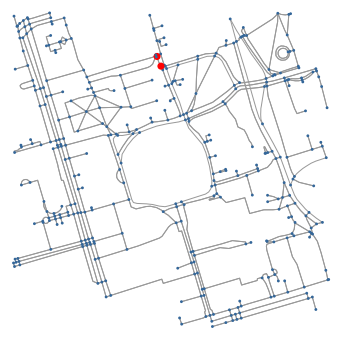

In [73]:
nc = ['r' if node in x  else '#336699' for node in G.nodes()]
ns = [50 if node in x else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [74]:
G[150430583]

KeyError: 150430583

In [65]:
import pandas as pd

In [66]:
for node in G1:
    for prop in node:
        print(prop)
        print((node[prop]))
        print("....................................--------------------................................")
    

TypeError: 'int' object is not iterable

In [64]:
G[6028562355]

AdjacencyView({7311057937: {0: {'osmid': 639848941, 'highway': 'footway', 'oneway': False, 'length': 57.859}}, 389678124: {0: {'osmid': 34081569, 'highway': 'footway', 'access': 'permissive', 'oneway': False, 'length': 30.067999999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fba78c7d2e8>}}, 2557542523: {0: {'osmid': 34081569, 'highway': 'footway', 'access': 'permissive', 'oneway': False, 'length': 42.153000000000006, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fba78c7d320>}}})